In [1]:


import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from scipy import constants
%matplotlib inline
from matplotlib import rc, font_manager
ticks_font = font_manager.FontProperties(family='arial', style='normal',
                                         size=24, weight='normal', stretch='normal')
from copy import deepcopy

In [2]:
%load_ext autoreload
%autoreload 2
import sys
import os

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"/models")

from pseudoquaternary_CMSX4 import CMSX4_seg_profile
from scipy import constants

In [4]:
CMSX4_seg_profile?

Init signature:
CMSX4_seg_profile(
    D0_Co,
    Q_Co,
    E_seg_Co,
    D0_Cr,
    Q_Cr,
    E_seg_Cr,
    c0_Co,
    c0_Cr,
    L_NiCr,
    L_NiCo,
    L_NiCrCo,
    L_CrCo,
    L_AlCr,
    L_AlCrNi,
    L_AlCrCo,
    L_NiCoAl,
    Lg_NiCo_Cr,
    Lg_NiCo_Al,
    Lg_Ni_AlCr,
    Lg_Co_AlCr,
    T,
    d,
    nd,
    dt,
    nt,
)
Docstring:      <no docstring>
Init docstring:
A class to calculate the segregation profiles as a function of time for a the CMSX-4 system.
Longsheng Feng's paper for Co-Cr co-segregation on the SISF. 
The quaternary system is (Co,Ni)3(Al,Cr) where Co and Ni take the Ni-sublattice sites and the Al-sublattice sites are occupied by Cr and Al. Therefore, the diffusion of Co and Cr in different sublattice sites are considered separately. 

...

Attributes
----------
D0_Cr and D0_Co: 1d array
    diffusion coefficients of solute Cr and Co, have the same length as the number of layers $nd$
Q_Cr and Q_Co : 1d array
    diffusion energy barriers of solute Cr and Co

In [5]:
# Grid and time step parameters
data_Ni = pd.read_json('../data/Ni_221_flip_E.json')
# 
b = 2.5e-10 #m
a = np.sqrt(2)*b
d = a/np.sqrt(3)
d = b
nd = 100

# segregation parameters
T = 1023 #K

# C: Co

c0_Co = 0.066

D0_Co = 6.616e-07 #m^2/s
Q_Co = 224.09 #kJ/mol

E_seg_list_Co = np.zeros(nd)
E_seg_list_Co[0] = -0.0165#data_Ni['Co'][0]
E_seg_list_Co[1] = 0#data_Ni['Co'][1]
E_seg_list_Co[2] = 0#data_Ni['Co'][2]
E_seg_list_Co[3] = 0#data_Ni['Co'][3]
E_seg_list_Co[4] = 0#data_Ni['Co'][4]


Q_list_Co = np.random.normal(loc=Q_Co,scale=5,size=nd)

# B: Cr
c0_Cr = 0.022

D0_Cr = 0.001821 #m^2/s
Q_Cr = 307.99 #kJ/mol


E_seg_list_Cr2 = np.zeros(nd)


E_seg_list_Cr2[0] = (-420/1000)  
E_seg_list_Cr2[1] = (-397/1000)  
E_seg_list_Cr2[2] = (-141/1000)  
E_seg_list_Cr2[3] = (0/1000)  
E_seg_list_Cr2[4] = (0/1000) 



Q_list_Cr = np.random.normal(loc=Q_Cr,scale=5,size=nd)


# time
dt = 0.015  # time step size /s
nt = 20000  # number of time steps


In [6]:
# solute-solute interaction energies
J2eV = 8.617333262145e-5/1.380649e-23
NA = constants.Avogadro

# data from https://doi.org/10.1016/j.calphad.2015.12.007
# Cr in Ni # FCC
L_NiCr = (+8030-12.8801*T) * J2eV /NA

# Co in Ni # FCC
L_NiCo = (-800+1.2629*T) * J2eV /NA

# Co-Cr in Ni # FCC
L_NiCrCo = (-40710+13.5334*T) * J2eV /NA

# Co-Cr
L_CrCo = (+1500-9.592*T) * J2eV/NA  # value used in Liu's calphad paper
#L_CrCo = (-24052.09+8.1884*T) * J2eV/NA # another value available in Liu's thesis from another reference


# Al-Cr
L_AlCr = (-45900+6*T) * J2eV/NA
# Al-Cr-Ni
L_AlCrNi = 30300 * J2eV/NA
# Al-Co-Cr
L_AlCrCo = (+989.5+8.277709*T)*J2eV/NA
# Al-Co-Ni
L_NiCoAl = 0

######################################################################
# gamma prime
Lg_AlCr = 0 * J2eV / NA # value used in Liu's calphad paper
#Lg_AlCr = -830 * J2eV / NA # value not confirmed? 
U_CoCr = U_CrCo = 0 # value used in Liu's calphad paper
#U_CoCr = U_CrCo = (-5616+9.250*T) * J2eV/NA # another value available in Liu's thesis: -5616+9.250*T
#########################
U_CoNi = U_NiCo = 0
U_CoAl = U_AlCo = -4872 * J2eV / NA
#########################

U_NiCr = U_CrNi = -1980 *J2eV/NA

UALNI = (-22212.8931+4.39570389*T) 
TROIS = 3
UNTIER = TROIS**(-1)
U_NiAl = U_AlNi = 2*UNTIER*UALNI * J2eV/NA

#A_term_Co = self.L_NiCo + X_layers_Cr*self.L_NiCrCo + X_layers_Al*self.L_NiCoAl + 55/9*(X_layers_Cr*self.Lg_NiCo_Cr + X_layers_Al*self.Lg_NiCo_Al)

a_Ni3Cr = 0
a_Co3Cr = 0

a_Ni3Al = 0
a_Co3Al = 0

G_Ni3Cr = (3*U_NiCr+3*a_Ni3Cr)
G_Co3Cr = (3*U_CoCr+3*a_Co3Cr)
G_Ni3Al = (3*U_NiAl+3*a_Ni3Al)
G_Co3Al = (3*U_CoAl+3*a_Co3Al)

a_CoNi2Cr = 0
a_Co2NiCr = 0 
a_CoNi2Al = 0
a_Co2NiAl = 0

G_CoNi2Cr = 2*U_CoNi + 2*U_CoCr + U_NiCr + a_CoNi2Cr
G_Co2NiCr = 2*U_CoNi + 2*U_CoCr + U_NiCr + a_Co2NiCr

G_CoNi2Al = 2*U_CoNi + 2*U_CoAl + U_NiAl + a_CoNi2Al
G_Co2NiAl = 2*U_CoNi + 2*U_CoAl + U_NiAl + a_Co2NiAl

Lg_NiCo_Cr = -3/2*G_Ni3Cr - 3/2*G_Co3Cr + 3/2*G_CoNi2Cr + 3/2*G_Co2NiCr
Lg_NiCo_Al = -3/2*G_Ni3Al - 3/2*G_Co3Al + 3/2*G_CoNi2Al + 3/2*G_Co2NiAl

Lg_Ni_AlCr = Lg_Co_AlCr = Lg_AlCr


In [14]:
system = CMSX4_seg_profile(D0_Co,Q_Co, # 1d array, same length as nd
                E_seg_list_Co,# 1d array, same length as nd
                D0_Cr,Q_Cr, # 1d array, same length as nd
                
                E_seg_list_Cr2, 
                
                             
                c0_Co,c0_Cr,
                             
                L_NiCr,
                L_NiCo,
                L_NiCrCo,
                L_CrCo,

                L_AlCr,
                L_AlCrNi,
                L_AlCrCo,
                L_NiCoAl,
                             
                Lg_NiCo_Cr,
                Lg_NiCo_Al,
                             
                Lg_Ni_AlCr,
                Lg_Co_AlCr,
                
                T,  # temperature
                d,  # layer distance
                nd, # number of layers
                dt,
                nt)


In [15]:
system.diffusivity(system.D0_Co,system.Q_Co,system.T)


2.3918092949888722e-18

In [16]:
system.diffusivity(system.D0_Cr,system.Q_Cr,system.T)

3.4242803918193867e-19

In [17]:
system.tabulate_calc_res()

/Users/Dongsheng/project/suzuki_kinetics/github_version/Segregation_kinetics/models/pseudoquaternary_CMSX4.py:307: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  
/Users/Dongsheng/project/suzuki_kinetics/github_version/Segregation_kinetics/models/pseudoquaternary_CMSX4.py:310: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


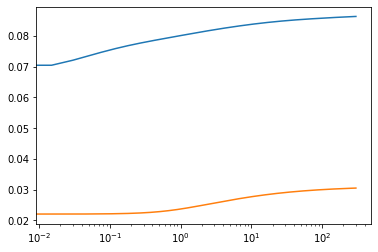

In [18]:
plt.plot(system.calc_data['time(s)'],system.calc_data['x_Co_layer_0'])
plt.plot(system.calc_data['time(s)'],system.calc_data['x_Cr_layer_0'])
plt.xscale('log')
#plt.plot(system.calc_data['time(s)'],system.calc_data['x_Cr_layer_0'])

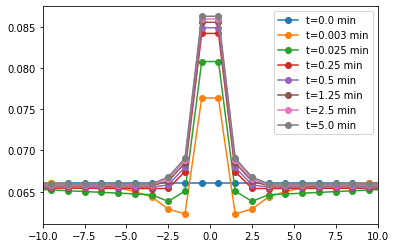

In [19]:
for i in [0,10,100,1000,2000,5000,10000,20000]:
    X_of_layers = np.hstack([system.X_layers_Co_vs_t[i][::-1],system.X_layers_Co_vs_t[i]])
    
    layers = np.arange(nd)+0.5
    
    n_layers = np.hstack([-layers[::-1],layers])
    plt.plot(n_layers,X_of_layers,'-o',
             label=f't={np.round(system.t[i]/60,3)} min')
    
plt.xlim(-10,10)
plt.legend()


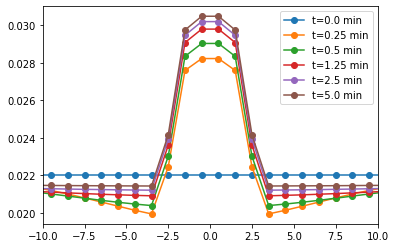

In [20]:
for i in [0,1000,2000,5000,10000,20000]:
    X_of_layers = np.hstack([system.X_layers_Cr_vs_t[i][::-1],system.X_layers_Cr_vs_t[i]])
    layers = np.arange(nd)+0.5

    n_layers = np.hstack([-layers[::-1],layers])
    plt.plot(n_layers,X_of_layers,'-o',
             label=f't={np.round(system.t[i]/60,3)} min')

plt.xlim(-10,10)
#plt.ylim(0.015,0.032)
plt.legend()


In [22]:
t = system.t

<Figure size 432x288 with 0 Axes>

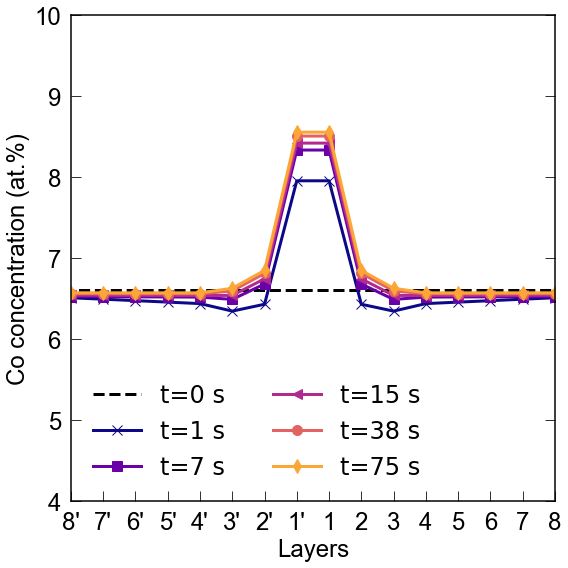

In [23]:
plt.draw()
f = plt.figure(figsize=(8,8))

(ax1) = f.subplots(1,1)
[i.set_linewidth(1.5) for i in ax1.spines.values()]

ax1.set_xlim(-7.5,7.5)
ax1.set_ylim(4,10)

def generate_gradient_colors(num_colors=10):
    # Create a gradient from one color to another
    colors = plt.cm.plasma(np.linspace(0, 1, num_colors))
    return colors

CB_color_cycle = generate_gradient_colors(num_colors=6)
                  
markers = ['x','s','<','o','d','>','v']

m_i = 0

for i in [0]:
    X_of_layers = np.hstack([system.X_layers_Co_vs_t[i][::-1],system.X_layers_Co_vs_t[i]])*100
    layers = np.arange(nd)+0.5
    
    n_layers = np.hstack([-layers[::-1],layers])
    
    ax1.plot(n_layers,X_of_layers,ls='--',lw=3,color='k',
             label=f't={int(np.ceil(t[i]))} s')
    #m_i +=1 
    
    
for i in [50,500,1000,2500,5000]:
    X_of_layers = np.hstack([system.X_layers_Co_vs_t[i][::-1],system.X_layers_Co_vs_t[i]])*100
    layers = np.arange(nd)+0.5
    
    n_layers = np.hstack([-layers[::-1],layers])
    
    ax1.plot(n_layers,X_of_layers,marker=markers[m_i],color=CB_color_cycle[m_i],lw=3,markersize=10,
             label=f't={int(np.round(t[i]))} s')
    m_i +=1 
ax1.set_xticks([x+0.5 for x in np.arange(-8,8)])
labellist = [x for x in range(1,9)]

ax1.set_xticklabels([str(x)+'\'' for x in labellist[::-1]]+labellist,fontsize=24)

ax1.tick_params(direction='in',axis='both',length=10,right=True,pad=10)
for labelx1 in (ax1.get_xticklabels()):
    labelx1.set_fontproperties(ticks_font)
    
for labely1 in (ax1.get_yticklabels()):
    labely1.set_fontproperties(ticks_font)
    
ax1.set_xlabel('Layers',fontproperties=ticks_font)
ax1.legend(fontsize=24,frameon=False,ncol=2)
ax1.set_ylabel('Co concentration (at.%)',fontproperties=ticks_font)
plt.tight_layout()
#f.savefig('./plots/NiCoCr_ISF_Co_seg_vs_layers.pdf')

<Figure size 432x288 with 0 Axes>

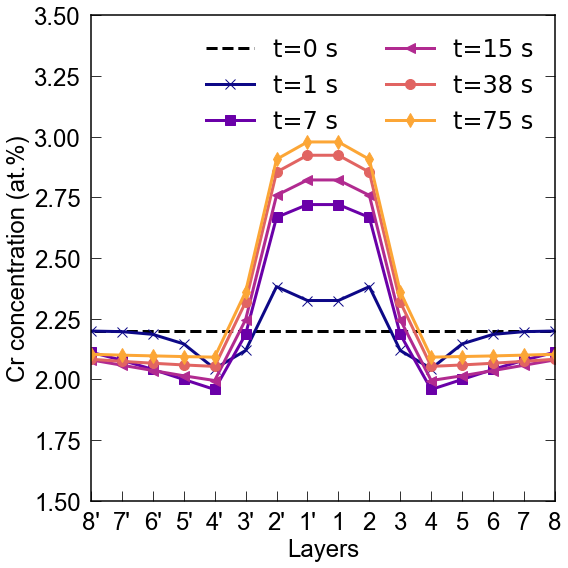

In [24]:
plt.draw()
f = plt.figure(figsize=(8,8))

(ax1) = f.subplots(1,1)
[i.set_linewidth(1.5) for i in ax1.spines.values()]

ax1.set_xlim(-7.5,7.5)
ax1.set_ylim(1.5,3.5)

def generate_gradient_colors(num_colors=10):
    # Create a gradient from one color to another
    colors = plt.cm.plasma(np.linspace(0, 1, num_colors))
    return colors

CB_color_cycle = generate_gradient_colors(num_colors=6)
                  
markers = ['x','s','<','o','d','>','v']

m_i = 0

for i in [0]:
    X_of_layers = np.hstack([system.X_layers_Cr_vs_t[i][::-1],system.X_layers_Cr_vs_t[i]])*100
    layers = np.arange(nd)+0.5
    
    n_layers = np.hstack([-layers[::-1],layers])
    
    ax1.plot(n_layers,X_of_layers,ls='--',lw=3,color='k',
             label=f't={int(np.ceil(t[i]))} s')
    #m_i +=1 
    
    
for i in [50,500,1000,2500,5000]:
    X_of_layers = np.hstack([system.X_layers_Cr_vs_t[i][::-1],system.X_layers_Cr_vs_t[i]])*100
    layers = np.arange(nd)+0.5
    
    n_layers = np.hstack([-layers[::-1],layers])
    
    ax1.plot(n_layers,X_of_layers,marker=markers[m_i],color=CB_color_cycle[m_i],lw=3,markersize=10,
             label=f't={int(np.round(t[i]))} s')
    m_i +=1 
ax1.set_xticks([x+0.5 for x in np.arange(-8,8)])
labellist = [x for x in range(1,9)]

ax1.set_xticklabels([str(x)+'\'' for x in labellist[::-1]]+labellist,fontsize=24)

ax1.tick_params(direction='in',axis='both',length=10,right=True,pad=10)
for labelx1 in (ax1.get_xticklabels()):
    labelx1.set_fontproperties(ticks_font)
    
for labely1 in (ax1.get_yticklabels()):
    labely1.set_fontproperties(ticks_font)
    
ax1.set_xlabel('Layers',fontproperties=ticks_font)
ax1.legend(fontsize=24,frameon=False,ncol=2)
ax1.set_ylabel('Cr concentration (at.%)',fontproperties=ticks_font)
plt.tight_layout()
#f.savefig('./plots/NiCoCr_ISF_Cr_seg_vs_layers.pdf')


In [25]:
#exp_data_Co = pd.read_csv('./exp_data/CMSX4_Co.csv')
#exp_data_Cr = pd.read_csv('./exp_data/CMSX4_Cr.csv')

<Figure size 432x288 with 0 Axes>

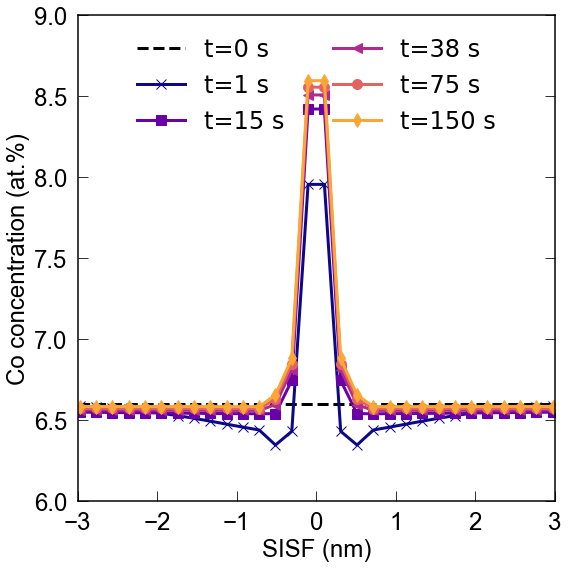

In [26]:
plt.draw()
f = plt.figure(figsize=(8,8))

(ax1) = f.subplots(1,1)
[i.set_linewidth(1.5) for i in ax1.spines.values()]

ax1.set_xlim(-3,3)
ax1.set_ylim(6.,9)

def generate_gradient_colors(num_colors=10):
    # Create a gradient from one color to another
    colors = plt.cm.plasma(np.linspace(0, 1, num_colors))
    return colors

CB_color_cycle = generate_gradient_colors(num_colors=6)
                  
markers = ['x','s','<','o','d','>','v']



m_i = 0

for i in [0]:
    X_of_layers = np.hstack([system.X_layers_Co_vs_t[i][::-1],system.X_layers_Co_vs_t[i]])*100
    layers = np.arange(nd)+0.5
    
    n_layers = np.hstack([-layers[::-1],layers])
    
    ax1.plot(n_layers,X_of_layers,ls='--',lw=3,color='k',
             label=f't={int(np.ceil(t[i]))} s')
    #m_i +=1 
    
    
for i in [50,1000,2500,5000,10000]:
    X_of_layers = np.hstack([system.X_layers_Co_vs_t[i][::-1],system.X_layers_Co_vs_t[i]])*100
    layers = np.arange(nd)+0.5
    
    n_layers = np.hstack([-layers[::-1],layers])*0.205
    
    ax1.plot(n_layers,X_of_layers,marker=markers[m_i],color=CB_color_cycle[m_i],lw=3,markersize=10,
             label=f't={int(np.round(t[i]))} s')
    m_i +=1 

#ax1.plot(exp_data_Co.x-0.1,exp_data_Co.y,ls='-',lw=3,color='b',)    
#ax1.set_xticks([x+0.5 for x in np.arange(-8,8)])



#labellist = [x for x in range(1,9)]

#ax1.set_xticklabels([str(x)+'\'' for x in labellist[::-1]]+labellist,fontsize=24)

ax1.tick_params(direction='in',axis='both',length=10,right=True,pad=10)
for labelx1 in (ax1.get_xticklabels()):
    labelx1.set_fontproperties(ticks_font)
    
for labely1 in (ax1.get_yticklabels()):
    labely1.set_fontproperties(ticks_font)
    
ax1.set_xlabel('SISF (nm)',fontproperties=ticks_font)
ax1.legend(fontsize=24,frameon=False,ncol=2,loc='upper center')
ax1.set_ylabel('Co concentration (at.%)',fontproperties=ticks_font)
plt.tight_layout()
#f.savefig('./plots/CMSX4_SISF_Co_seg_vs_layers.pdf')

<Figure size 432x288 with 0 Axes>

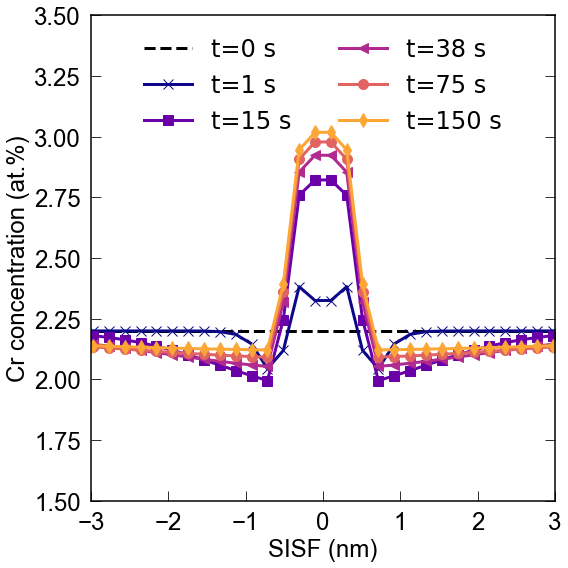

In [27]:
plt.draw()
f = plt.figure(figsize=(8,8))

(ax1) = f.subplots(1,1)
[i.set_linewidth(1.5) for i in ax1.spines.values()]

ax1.set_xlim(-3,3)
ax1.set_ylim(1.5,3.5)

def generate_gradient_colors(num_colors=10):
    # Create a gradient from one color to another
    colors = plt.cm.plasma(np.linspace(0, 1, num_colors))
    return colors

CB_color_cycle = generate_gradient_colors(num_colors=6)
                  
markers = ['x','s','<','o','d','>','v']

m_i = 0

for i in [0]:
    X_of_layers = np.hstack([system.X_layers_Cr_vs_t[i][::-1],system.X_layers_Cr_vs_t[i]])*100
    layers = np.arange(nd)+0.5
    
    n_layers = np.hstack([-layers[::-1],layers])*0.205
    
    ax1.plot(n_layers,X_of_layers,ls='--',lw=3,color='k',
             label=f't={int(np.ceil(t[i]))} s')
    #m_i +=1 
    
    
for i in [50,1000,2500,5000,10000]:
    X_of_layers = np.hstack([system.X_layers_Cr_vs_t[i][::-1],system.X_layers_Cr_vs_t[i]])*100
    layers = np.arange(nd)+0.5
    
    n_layers = np.hstack([-layers[::-1],layers])*0.205
    
    ax1.plot(n_layers,X_of_layers,marker=markers[m_i],color=CB_color_cycle[m_i],lw=3,markersize=10,
             label=f't={int(np.round(t[i]))} s')
    m_i +=1 
    
    
#ax1.plot(exp_data_Cr.x,exp_data_Cr.y,ls='-',lw=3,color='b')    
#ax1.set_xticks([x+0.5 for x in np.arange(-8,8)])
#labellist = [x for x in range(1,9)]

#ax1.set_xticklabels([str(x)+'\'' for x in labellist[::-1]]+labellist,fontsize=24)

ax1.tick_params(direction='in',axis='both',length=10,right=True,pad=10)
for labelx1 in (ax1.get_xticklabels()):
    labelx1.set_fontproperties(ticks_font)
    
for labely1 in (ax1.get_yticklabels()):
    labely1.set_fontproperties(ticks_font)
    
ax1.set_xlabel('SISF (nm)',fontproperties=ticks_font)
ax1.legend(fontsize=24,frameon=False,ncol=2,loc='upper center')
ax1.set_ylabel('Cr concentration (at.%)',fontproperties=ticks_font)
plt.tight_layout()
#f.savefig('./plots/CMSX4_SISF_Cr_seg_vs_layers.pdf')
